#### Importación de las dependencias 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Cargar los datos

In [4]:
df = pd.read_csv("taxi_trip_pricing.csv")


In [5]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


#### Selección y limpieza de los datos

In [9]:
df_clean = df.dropna(subset=[
    'Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'
])
df_clean.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328


#### Selección de variables 
features (X): son las variables independientes (factores que afectan el precio).
target (y): es la variable dependiente (el precio del viaje que queremos predecir).

In [10]:
features = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
            'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
target = 'Trip_Price'

X = df_clean[features]
y = df_clean[target]

#### División en entrenamiento y prueba


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Entrenamiento del modelo

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### Predicción

In [13]:
y_pred = model.predict(X_test)


#### Evaluación del modelo

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")


Error cuadrático medio (MSE): 149.76285214894125


#### visualización de los datos

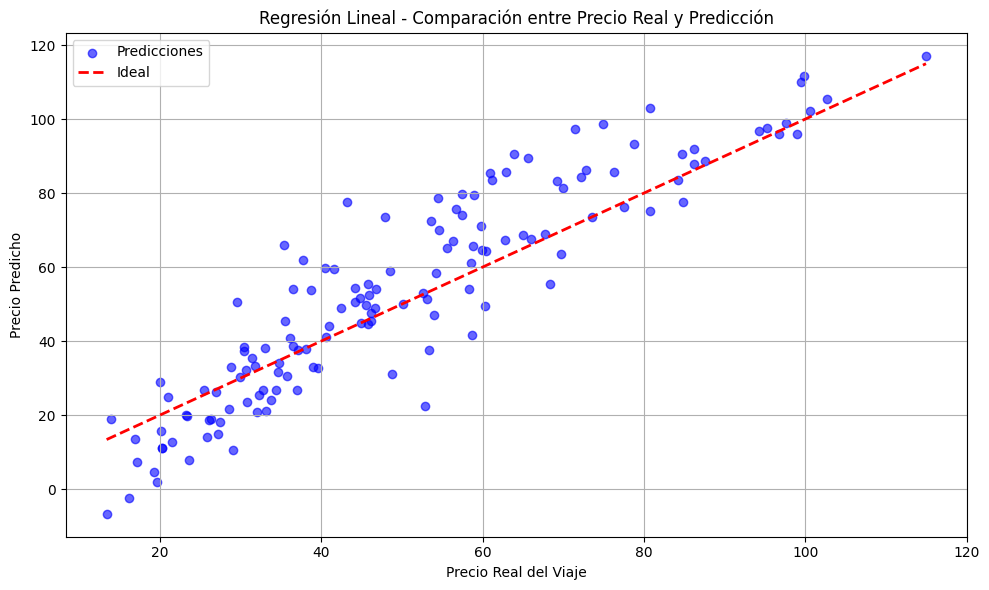

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("Precio Real del Viaje")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal - Comparación entre Precio Real y Predicción")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
